In [1]:
import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
from  statsmodels.stats.multitest import multipletests

In [2]:
data_folder = "nbatch_with_bc/"

In [3]:
uni_to_prot = pd.read_csv('data/uniprot_protein.csv')

In [4]:
syn_results = pd.read_csv(data_folder + "syn_results/final_results.tsv", sep='\t')

In [5]:
drug_df = pd.read_csv('../data/pc_drug_response.csv', usecols=['CHEMBL','target_pathway']).drop_duplicates(ignore_index=True)
#drug_df = drug_df[drug_df.target_pathway == 'Metabolism'].set_index('drug_id').dropna()
drug_df

,CHEMBL,target_pathway
0,CHEMBL92,Mitosis
1,CHEMBL34259,DNA replication
2,CHEMBL939,EGFR signaling
3,CHEMBL98,Chromatin histone acetylation
4,CHEMBL1201182,PI3K/MTOR signaling
5,CHEMBL288441,"Other, kinases"
6,CHEMBL603469,"Other, kinases"
7,CHEMBL109480,Protein stability and degradation
8,CHEMBL1173655,EGFR signaling
9,CHEMBL191334,p53 pathway


Do I want to change uniprot to prot name ? have file for translation

In [10]:
uni_to_prot = uni_to_prot.set_index('UniProt')
#uni_to_prot

In [7]:
#syn_results.snps = syn_results.snps.str.replace('-7','Z')
syn_results[syn_results.drug=='CHEMBL603469'].sort_values(['P>|z|'])

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug
909468,AaFGRi:Ojfbfj,2.697169e-01,0.047,5.692268,1.775416e-08,0.176703,0.362730,783,0.131174,True,A0FGR8*O95159,2,CHEMBL603469
912305,QafDdc:Qjjhbe,-2.889081e-01,0.056,-5.195395,2.610881e-07,-0.398068,-0.179748,783,0.069459,True,Q05D32*Q99714,2,CHEMBL603469
921296,Qbdijf:QiIUHd,-3.314644e-01,0.064,-5.162967,3.088546e-07,-0.457491,-0.205438,783,0.076135,True,Q13895*Q8IUH3,2,CHEMBL603469
935756,QjUKXh:QjUPTi,-2.248155e-01,0.044,-5.111093,4.033229e-07,-0.311160,-0.138471,783,0.057265,True,Q9UKX7*Q9UPT8,2,CHEMBL603469
941751,Qbdijf:Qbebad,-4.045321e-01,0.085,-4.780826,2.087276e-06,-0.570634,-0.238431,783,0.081901,True,Q13895*Q14103,2,CHEMBL603469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909206,Oaagcj:QjUFNa,4.607459e-06,0.058,0.000080,9.999364e-01,-0.113428,0.113437,783,0.014767,True,O00629*Q9UFN0,2,CHEMBL603469
934893,Qbebdj:QjNUJb,3.327525e-07,0.007,0.000049,9.999606e-01,-0.013217,0.013218,783,0.029518,True,Q14139*Q9NUJ1,2,CHEMBL603469
912114,QjNRfa:QjgHRj,1.238774e-06,0.032,0.000039,9.999689e-01,-0.062373,0.062375,783,0.032761,True,Q9NR50*Q96HR9,2,CHEMBL603469
919704,Paghfd:Pedeih,6.267250e-07,0.047,0.000013,9.999894e-01,-0.092943,0.092944,783,0.071211,True,P06753*P43487,2,CHEMBL603469


In [6]:
prot = pd.read_csv('results/exp_results/protein_models.tsv', sep='\t')
prot = prot[prot.coef_id != 'Intercept']
prot

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,train_MSE,MSE,train_pearsonR,pearsonR,drug,n_train,n_test,protein
1,AbLaTa,-0.089393,0.053,-1.679120,0.093530,-0.193899,0.015114,781,0.003606,3.268987,3.342770,0.060052,-0.075386,CHEMBL109480,781,45,A1L0T0
3,AeDbSa,0.036395,0.030,1.230715,0.218801,-0.021656,0.094446,781,0.001941,3.274451,3.417160,0.044052,-0.177657,CHEMBL109480,781,45,A4D1S0
5,AgNCSg,-0.032926,0.032,-1.020316,0.307895,-0.096275,0.030422,781,0.001335,3.276440,3.216234,0.036532,0.117714,CHEMBL109480,781,45,A6NCS6
7,Oaabjc,0.044026,0.018,2.386324,0.017256,0.007810,0.080243,781,0.007257,3.257009,3.437891,0.085188,-0.119427,CHEMBL109480,781,45,O00192
9,Oaacge,0.033838,0.074,0.454723,0.649435,-0.112237,0.179912,781,0.000265,3.279948,3.260403,0.016290,0.075802,CHEMBL109480,781,45,O00264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58953,QjYghg,0.054894,0.034,1.610969,0.107589,-0.011995,0.121782,786,0.003299,1.160042,1.176579,0.057440,-0.174441,CHEMBL98,786,45,Q9Y676
58955,QjYgia,-0.030525,0.009,-3.344938,0.000862,-0.048439,-0.012611,786,0.014070,1.147506,1.195453,0.118619,-0.046646,CHEMBL98,786,45,Q9Y680
58957,QjYgMb,0.052696,0.011,4.654386,0.000004,0.030471,0.074920,786,0.026889,1.132587,1.186052,0.163978,0.199182,CHEMBL98,786,45,Q9Y6M1
58959,QjYgMh,0.061189,0.015,4.080884,0.000049,0.031756,0.090622,786,0.020800,1.139673,1.105179,0.144222,0.256201,CHEMBL98,786,45,Q9Y6M7


In [11]:
alpha = 0.05
#with_c = []
drug_list = drug_df.CHEMBL.to_list()
drug_list = drug_df[drug_df.target_pathway == "EGFR signaling"].CHEMBL.to_list()

f = 0.2
syn_results = syn_results[np.abs(syn_results.coef) > f]

for d in drug_list:
    syn = syn_results[syn_results.drug == d].dropna().copy()
    if(syn.shape[0] == 0): continue
    syn['fdr_p'] = multipletests(syn['P>|z|'], method='fdr_bh')[1]
    #print(syn.shape[0])
    
    for alpha in [0.05]:
        for t in [f]:
            df = syn[['snps', 'coef', 'fdr_p']][(syn.fdr_p < alpha) & (np.abs(syn.coef) >= t)]
            df['proteins'] = df.snps.str.split('*')
            #with_c.append(syn)

            network = []
            if df.shape[0] == 0: print('not enough'); continue
            for i in df.index:
                pairs = [[prot_1, prot_2] for idx, prot_1 in enumerate(df.loc[i, 'proteins']) for prot_2 in df.loc[i, 'proteins'][idx+1:]]
                syn_net = pd.DataFrame(pairs, columns=['prot_1', 'prot_2'])
                syn_net.prot_1 = uni_to_prot.loc[syn_net.prot_1.str[:6]].values
                syn_net.prot_2 = uni_to_prot.loc[syn_net.prot_2.str[:6]].values
                syn_net['synergy'] = df.loc[i, 'snps']
                syn_net['coef'] = df.loc[i, 'coef']
                syn_net['fdr_p'] = df.loc[i, 'fdr_p'] # newly added
                syn_net['order'] = len(df.loc[i, 'proteins'])
                network.append(syn_net)
            network = pd.concat(network)
            network.drop_duplicates(ignore_index=True).to_csv(f'tmp/pc_{d}_{alpha}_{t}_network.csv', index=False)
            # print(network)
            
            
    protein = prot[prot.drug == d].dropna().copy()
    if(protein.shape[0] == 0): continue
    protein['fdr_p'] = multipletests(protein['P>|z|'], method='fdr_bh')[1]
    #print(protein.head(5))
    #print(protein.shape[0], protein.columns)
    for alpha in [0.05]:
        df = protein[['protein', 'coef', 'fdr_p']][protein.fdr_p < alpha]
        df.protein = uni_to_prot.loc[df.protein].values
        df.drop_duplicates(ignore_index=True).to_csv(f'tmp/pc_{d}_{alpha}_proteins.csv', index=False)
        # print(df.drop_duplicates(ignore_index=True))

<Axes: >

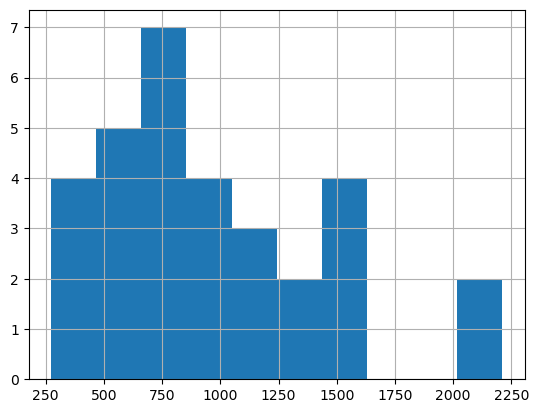

In [10]:
syn_results.dropna().drug.value_counts().hist()

In [28]:
G = nx.Graph(name='Protein synergies')

synergies = np.array(df[['prot_1', 'prot_2', 'coef']])


In [29]:
G = nx.from_pandas_edgelist(df=df, source='prot_1', target='prot_2')

In [30]:
nx.clustering(G)

{'AGRIN': 0,
 'ACON': 0,
 'LMO7': 0,
 'TXTP': 0,
 'LAMB3': 0,
 'CAV2': 0,
 '9CARL1': 0,
 'MSLN': 0,
 'SEPT2': 0,
 'NCPR': 0,
 'MBOA7': 0,
 'HCDH': 0,
 '3F10C1': 0,
 'ECHP': 0.02857142857142857,
 'H90B2': 0,
 'HIP1': 0.13333333333333333,
 'EGFR': 0,
 'PTPRS': 0,
 'WASL': 0,
 '4EHD2': 0,
 'PPTC7': 0,
 'PAK4': 0,
 'NP1L4': 0,
 'ALDH2': 0,
 'COR1C': 0,
 'RAB23': 0,
 'SERPH': 0,
 'TRXR2': 0,
 'MRP1': 0,
 'BCAM': 0.01818181818181818,
 'VTNC': 0,
 'F177A': 0,
 'RL1D1': 0,
 'CELR1': 0,
 'GOGB1': 0,
 'GDIA': 0,
 'RAI3': 0.004329004329004329,
 'DHRS7': 0,
 'ODBA': 0,
 'RS2': 0,
 'GSH0': 0,
 'ITB1': 0,
 '1433S': 0,
 'PLST': 0,
 'SUCB1': 0,
 'SUMF2': 0,
 'KTN1': 0.014285714285714285,
 'TOR2A': 0,
 '-7O1': 0,
 'ATRAP': 0,
 'NEB1': 0,
 'NMI': 0,
 '3ANKH1': 0,
 'NACAM': 0,
 'TB182': 0,
 'PLAK': 0,
 'TM214': 0,
 'UBP47': 0,
 'MYO1B': 0,
 'TMEDA': 0,
 'OSBP1': 0,
 'SPNS1': 0,
 'LMTK2': 0,
 'TCPG': 0,
 'VINEX': 0,
 'K2C80': 0,
 'MIC25': 0,
 'AK1BA': 0,
 'GNAI1': 0,
 'AP2A1': 0,
 'CLD1': 0,
 'SYNE2': 0,


In [31]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

In [32]:
nx.density(G), nx.density(G0)

(0.005763592192343135, 0.010256410256410256)

In [33]:
nx.number_of_nodes(G), nx.number_of_nodes(G0)

(346, 235)

In [71]:
G0.nodes

NodeView(('Q8NE71', 'Q9Y2X3', 'P50895', 'Q15149', 'O00468', 'P31947', 'P13797', 'P36957', 'O00461', 'Q6PD62', 'Q86U28', 'Q9P2B2', 'P62633', 'Q86UP2', 'O43818', 'P22061', 'Q9BX40', 'Q68C-7', 'Q9Y394', 'P00533', 'P16435', 'Q9H9P8', 'Q9Y624', 'P49755', 'P50454', 'O94992', 'Q8N6M0', 'Q8N3R9', 'P35241', 'Q08257', 'Q8TEW0', 'P31937', 'Q07157', 'Q6WK-7', 'Q9UNN8', 'O00291', 'Q9BVP2', 'P63096', 'Q9P206', 'P06730', 'P31949', 'P40121', 'P14923', 'Q9N-7M', 'O14530', 'P49748', 'O15270', 'P06737', 'P29590', 'P26885', 'P31150', 'O43795', 'Q99623', 'P04264', 'Q9H4G0', 'P50995', 'Q13825', 'Q9NTG7', 'Q14008', 'P26358', 'P51648', 'Q01970', 'P06756', 'Q6NUK1', 'O15230', 'O15269', 'P52943', 'P06865', 'P35221', 'Q9H6S3', 'Q13443', 'Q9C0C2', 'P22570', 'Q99733', 'O75208', 'Q03135', 'Q6N-7I', 'Q8NE86', 'Q9Y639', 'Q15165', 'Q15819', 'P05787', 'O43493', 'Q96GQ7', 'Q96FQ6', 'Q92896', 'O15031', 'O60841', 'P30044', 'Q14789', 'Q9BVI4', 'P00338', 'P10253', 'Q9H2U2', 'P16219', 'P52294', 'Q8WYA6', 'P38606', 'Q8NBJ7', 

In [34]:
c = [x[1]*25 for x in list(nx.degree(G0))]

In [35]:
s = [(10*v+1)*25 for v in nx.betweenness_centrality(G0).values()]

In [36]:
len(s), len(c)

(235, 235)

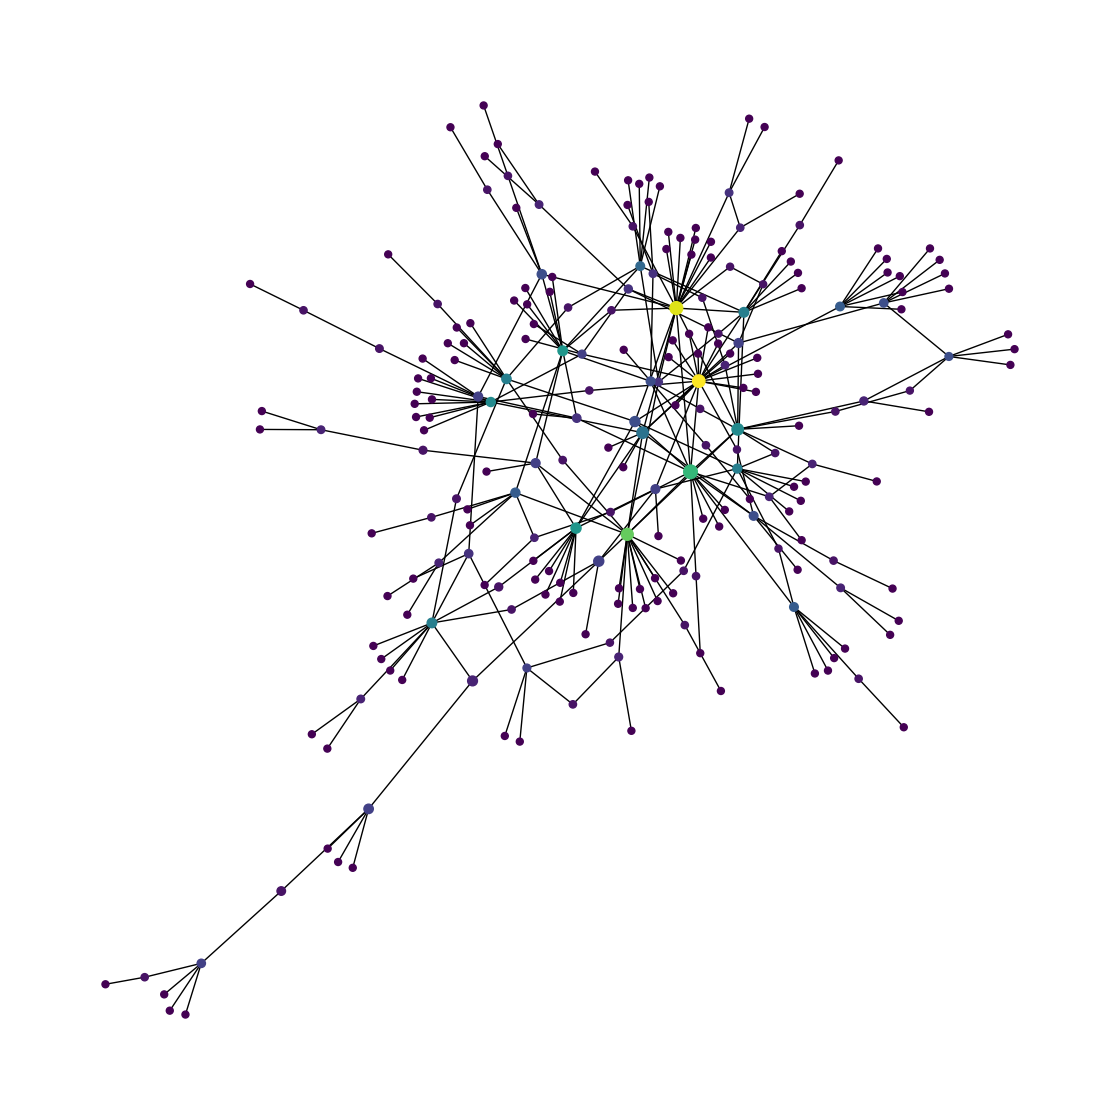

In [37]:
# pos = nx.spring_layout(G0) # position the nodes using the spring layout
plt.figure(figsize=(11,11))
nx.draw_spring(G0, node_size=s, node_color=c)
plt.axis('off')
plt.show()

In [61]:
h, a = nx.hits(G)

In [68]:
max(h, key=h.get)

'P50895'

In [69]:
h['P50895']

0.03628590130534492

In [70]:
nx.degree(G, 'P50895')

29